In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix, 
    classification_report
)
from copy import deepcopy
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial'

In [3]:
df_att = pd.read_csv('./DeepSP/trainresult.csv', index_col=0)
df_att.head()

,Cytosol,ER,Golgi,Mitochondrion,PM,Plastid,Ribosome,Vacuole,markers,score,pred,FDR,qvalue
Protein_ID,,,,,,,,,,,,,
AT5G25100,4.177885e-09,0.000001,9.999809e-01,9.837192e-09,3.391522e-08,0.000018,4.546466e-09,9.452736e-10,Golgi,0.999981,Golgi,0.0,0.0
AT2G35610,3.086672e-08,0.000004,9.998546e-01,4.626484e-07,2.527939e-07,0.000140,2.447209e-08,6.092410e-09,Golgi,0.999855,Golgi,0.0,0.0
AT1G11890,3.306097e-08,0.999853,3.400271e-06,2.030490e-07,7.776410e-05,0.000004,6.037958e-05,7.359088e-07,ER,0.999853,ER,0.0,0.0
AT3G48930,1.707581e-06,0.000068,9.653726e-08,1.026909e-05,2.136947e-04,0.000001,9.996269e-01,7.825043e-05,Ribosome,0.999627,Ribosome,0.0,0.0
AT3G21190,2.980570e-08,0.000011,9.995932e-01,2.524628e-07,2.008659e-07,0.000396,4.275434e-08,3.708486e-09,Golgi,0.999593,Golgi,0.0,0.0


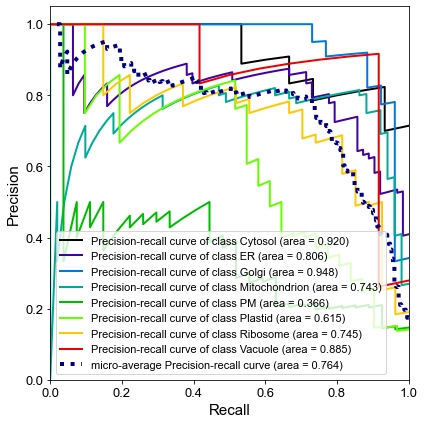

In [4]:
skplt.metrics.plot_precision_recall(df_att.markers, df_att.iloc[:, :8],
                      figsize=(6, 6))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.legend(fontsize=11)
plt.title(None)
plt.tight_layout()
# plt.savefig('../figure/nikolovski2014_DeepSPatt_PRC.pdf')

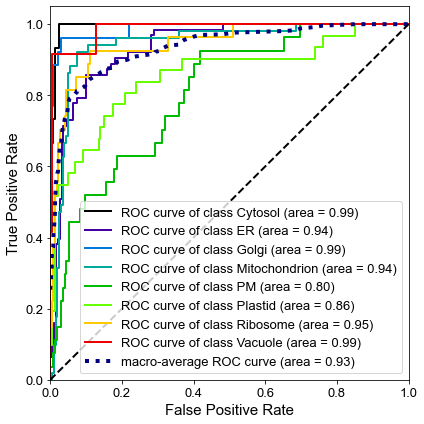

In [5]:
skplt.metrics.plot_roc(df_att.markers, df_att.iloc[:, :8],plot_micro=False,
                      figsize=(6, 6))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(fontsize=13)
plt.title(None)
plt.tight_layout()
# plt.savefig('../figure/nikolovski2014_DeepSPatt_ROC.pdf')

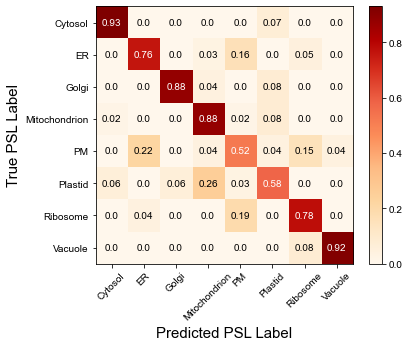

In [13]:
skplt.metrics.plot_confusion_matrix(df_att.markers,
                                    df_att.pred,
                                    normalize=True,
                                   figsize=(6, 5),
                                   cmap='OrRd')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('True PSL Label',fontsize=15)
plt.xlabel('Predicted PSL Label',fontsize=15)
plt.title(None)
plt.savefig('../figure/nikolovski2014_DeepSP_CF.pdf')

In [6]:
print(classification_report(df_att.markers, df_att.pred, digits=3))

               precision    recall  f1-score   support

      Cytosol      0.824     0.933     0.875        15
           ER      0.873     0.762     0.814        63
        Golgi      0.920     0.885     0.902        26
Mitochondrion      0.789     0.882     0.833        51
           PM      0.452     0.519     0.483        27
      Plastid      0.692     0.581     0.632        31
     Ribosome      0.724     0.778     0.750        27
      Vacuole      0.917     0.917     0.917        12

     accuracy                          0.770       252
    macro avg      0.774     0.782     0.776       252
 weighted avg      0.777     0.770     0.771       252



In [5]:
data = pd.read_csv('./DeepSP/nikolovski2014.csv')
DeepSPtest = pd.read_csv('./DeepSP/testresult.csv')[['Protein_ID', 'pred', 
                                                    'score', 'toppred']]
DeepSPtest.columns = ['Protein_ID', 'DeepSP classification',
                      'DeepSP score', 'Curated DeepSP predictions']
DeepSPtest.shape

(1133, 4)

In [11]:
result = pd.merge(data, DeepSPtest, on='Protein_ID', how='left')
result.loc[result['DeepSP classification'].isna(),
           'DeepSP classification'] = result.loc[
               result['DeepSP classification'].isna(), 'markers']
result.loc[result['DeepSP score'].isna(),'DeepSP score'] = 1.0
result.loc[result['Curated DeepSP predictions'].isna(),
           'Curated DeepSP predictions'] = result.loc[
               result['Curated DeepSP predictions'].isna(), 'markers']
result.shape

(1385, 25)

In [346]:
result.to_csv('./DeepSP_att/nikolovski2014_DeepSCP_result.csv', index=None)